In [1]:
from sklearn.metrics import mean_squared_error
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
#import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import scienceplots

In [2]:
plt.style.use('science')
plt.rc('text', usetex=True)

df_transient = pd.read_csv('Lmax_transient',sep=" ", header = None, names = ['Lmax_transient', 'T_Lmax'])
df_steady = pd.read_csv('Lmax_steady',sep=" ", header = None, names = ['Lmax_steady'])
df_dataset = pd.read_csv('Dataset',sep=" ", header = None, names = ['C0','H','W','v','alx','aly','alz','R','Gamma','Lambda'])
df_all = pd.concat([df_transient, df_steady], axis = 1)
df_all_sorted_steady = df_all.sort_values('Lmax_steady')
df_all_sorted_transient = df_all.sort_values('Lmax_transient')
df_all_time = df_all.sort_values('T_Lmax')

mpl.rcParams.update({'lines.linewidth':10, 'font.size':24})

In [3]:
# Import Data

df_corr_R = df_transient['Lmax_transient']*df_dataset['R']
df_corr = pd.concat([df_corr_R, df_steady], axis = 1)
df_corr = df_corr.rename(columns={0: "Lmax_transient_R_corrected"})
df_corr_sorted_steady = df_corr.sort_values('Lmax_steady')

# Plotting 

## Random Data $L_{max}$

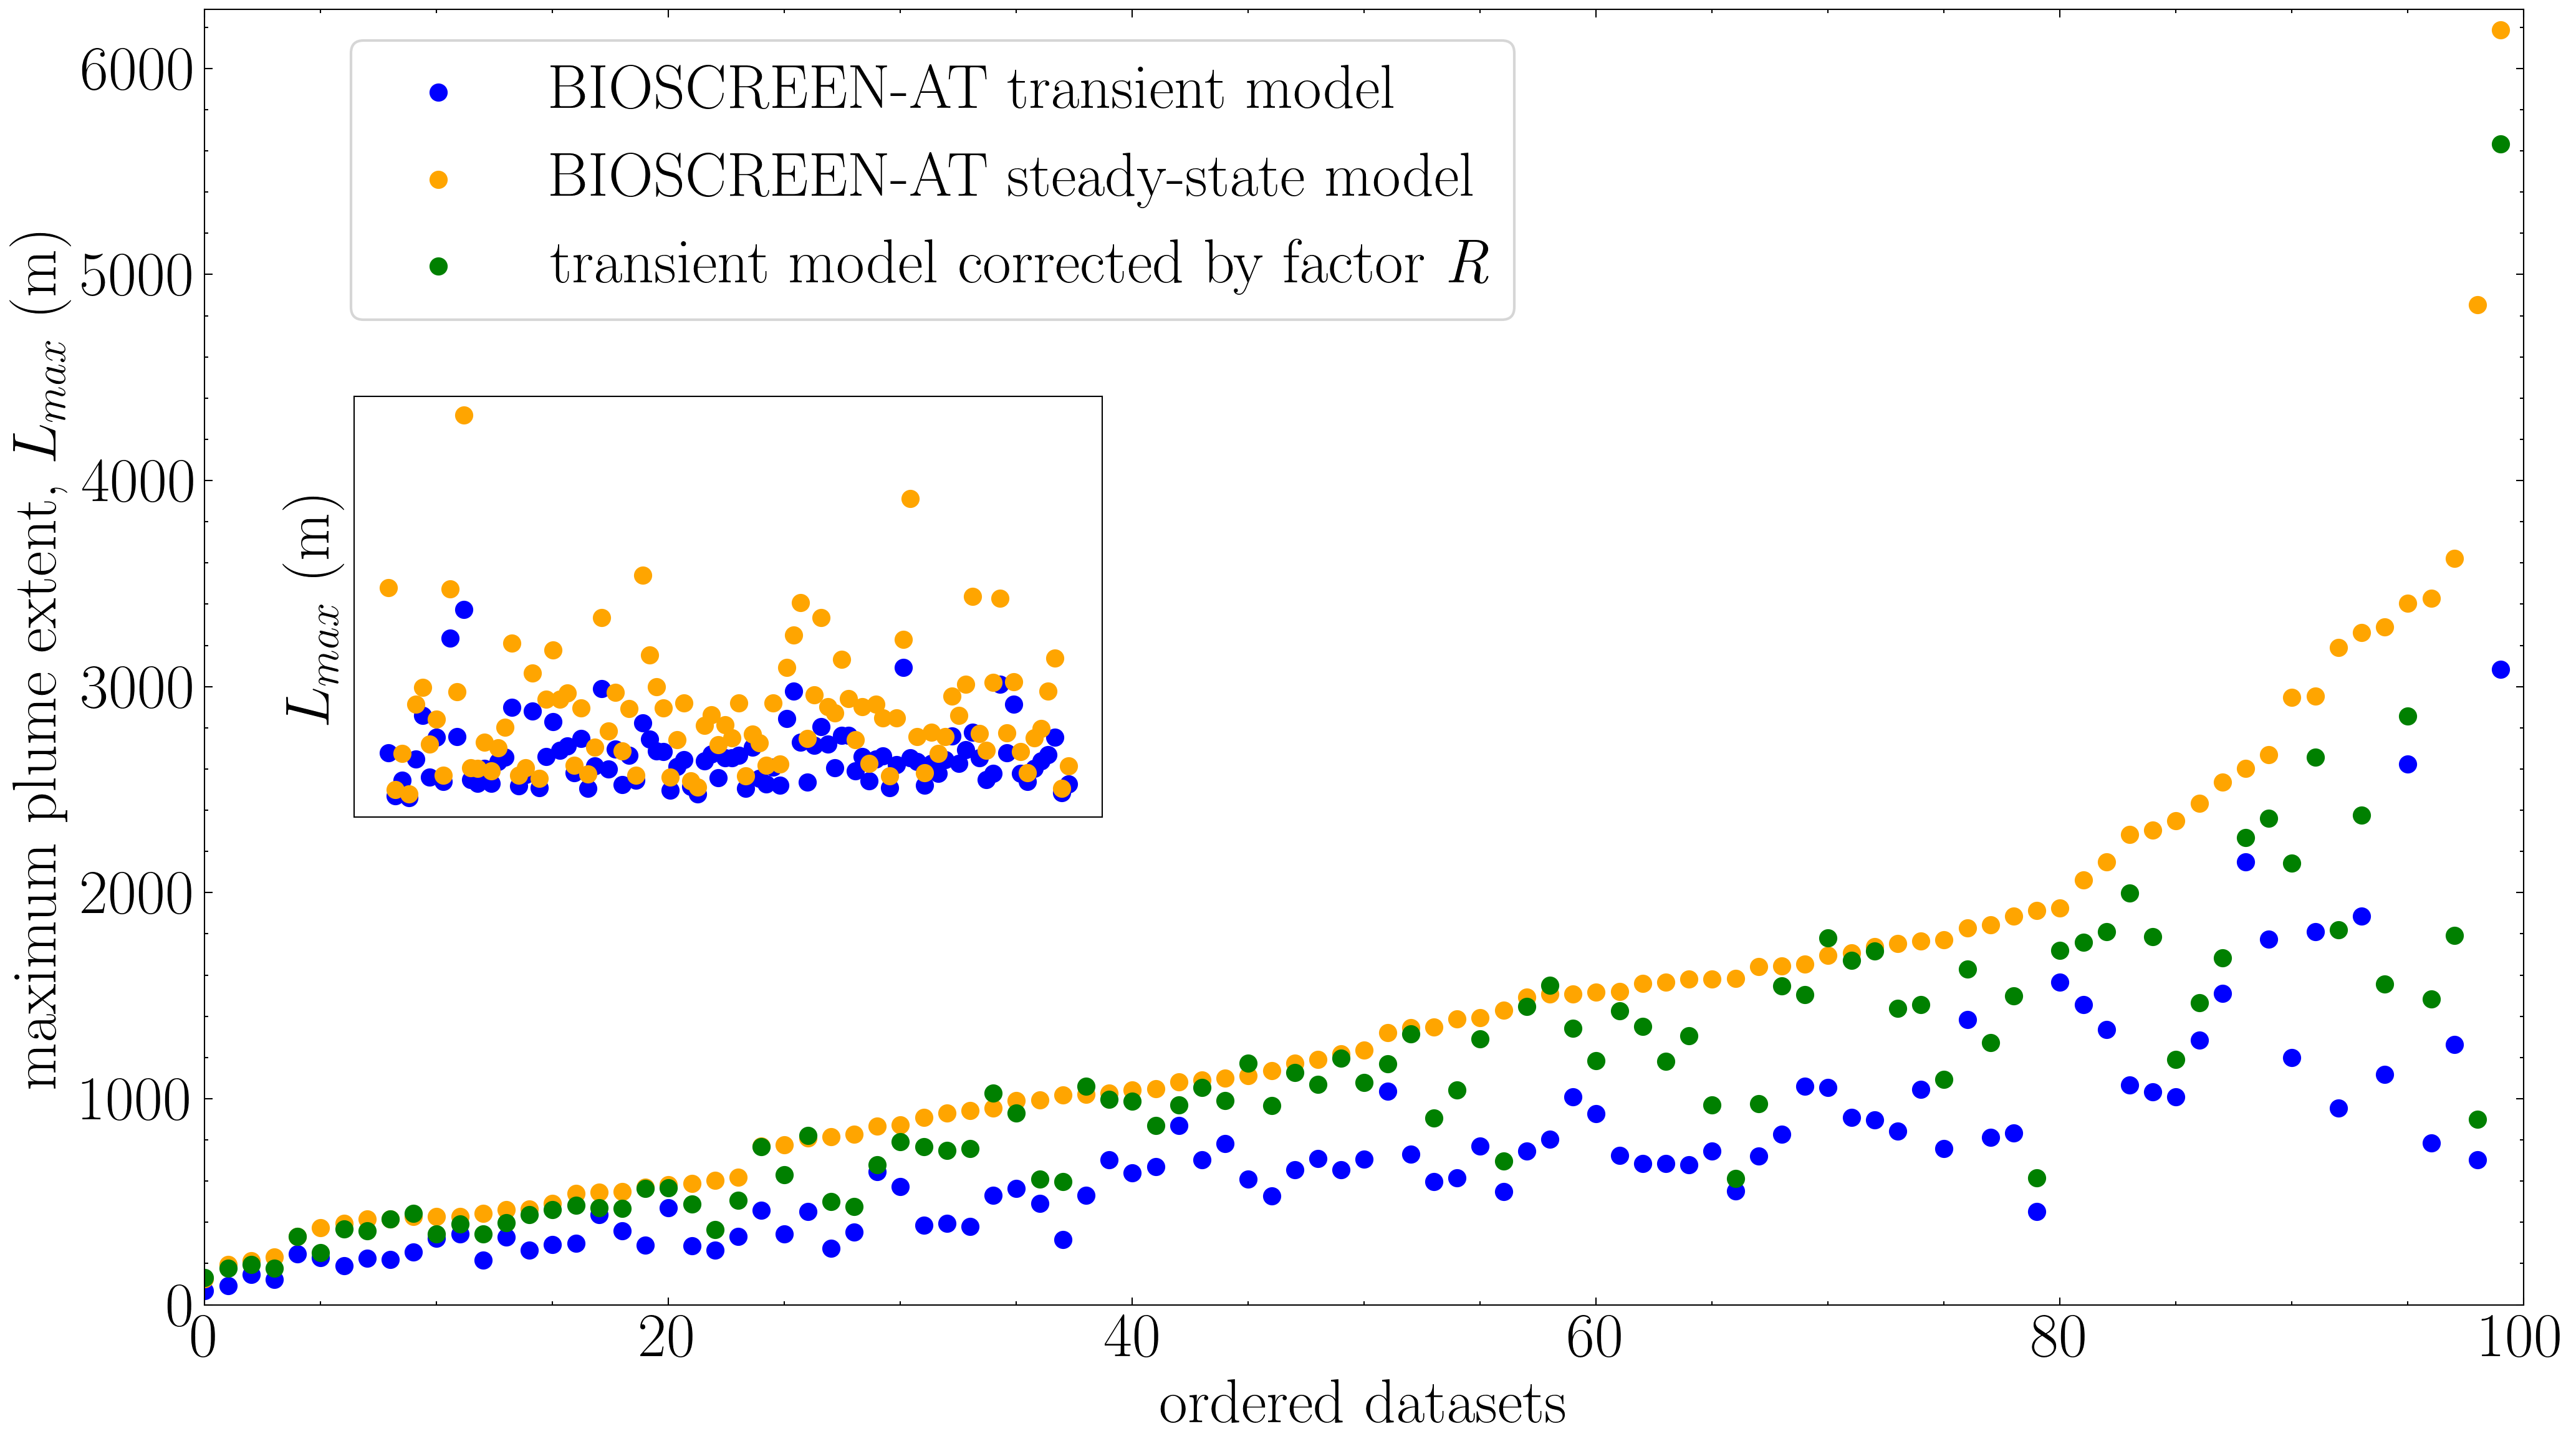

In [4]:
fig = plt.figure(figsize=(16,9), dpi=300)

ax1 = plt.axes(ylabel='maximum plume extent, $L_{max}$ (m)', xlabel='ordered datasets')
ax1.set_xlim(0, 100)
ax1.set_ylim(0, max(df_all['Lmax_steady']+100))
ax1.scatter(df_all_sorted_steady.reset_index().index, df_all_sorted_steady.reset_index()['Lmax_transient'], color= 'blue', label='BIOSCREEN-AT transient model')
ax1.scatter(df_all_sorted_steady.reset_index().index, df_all_sorted_steady.reset_index()['Lmax_steady'], color= 'orange', label='BIOSCREEN-AT steady-state model')
ax1.scatter(df_corr_sorted_steady.reset_index().index, df_corr_sorted_steady.reset_index()['Lmax_transient_R_corrected'], color= 'green', label='transient model corrected by factor $\it{R}$')

L=ax1.legend(frameon=True, loc='best', bbox_to_anchor=(0.328, 0.75, 0.25, 0.25))
#plt.grid()

ax2 = plt.axes([0.175, 0.4, 0.25, 0.25], ylabel='$L_{max}$ (m)')
ax2.set_xticks([])
ax2.set_yticks([])
ax2.scatter(df_all.index, df_all['Lmax_transient'], color='blue')
ax2.scatter(df_all.index, df_all['Lmax_steady'], color='orange')

## Random Data $T_{L_{max}}$

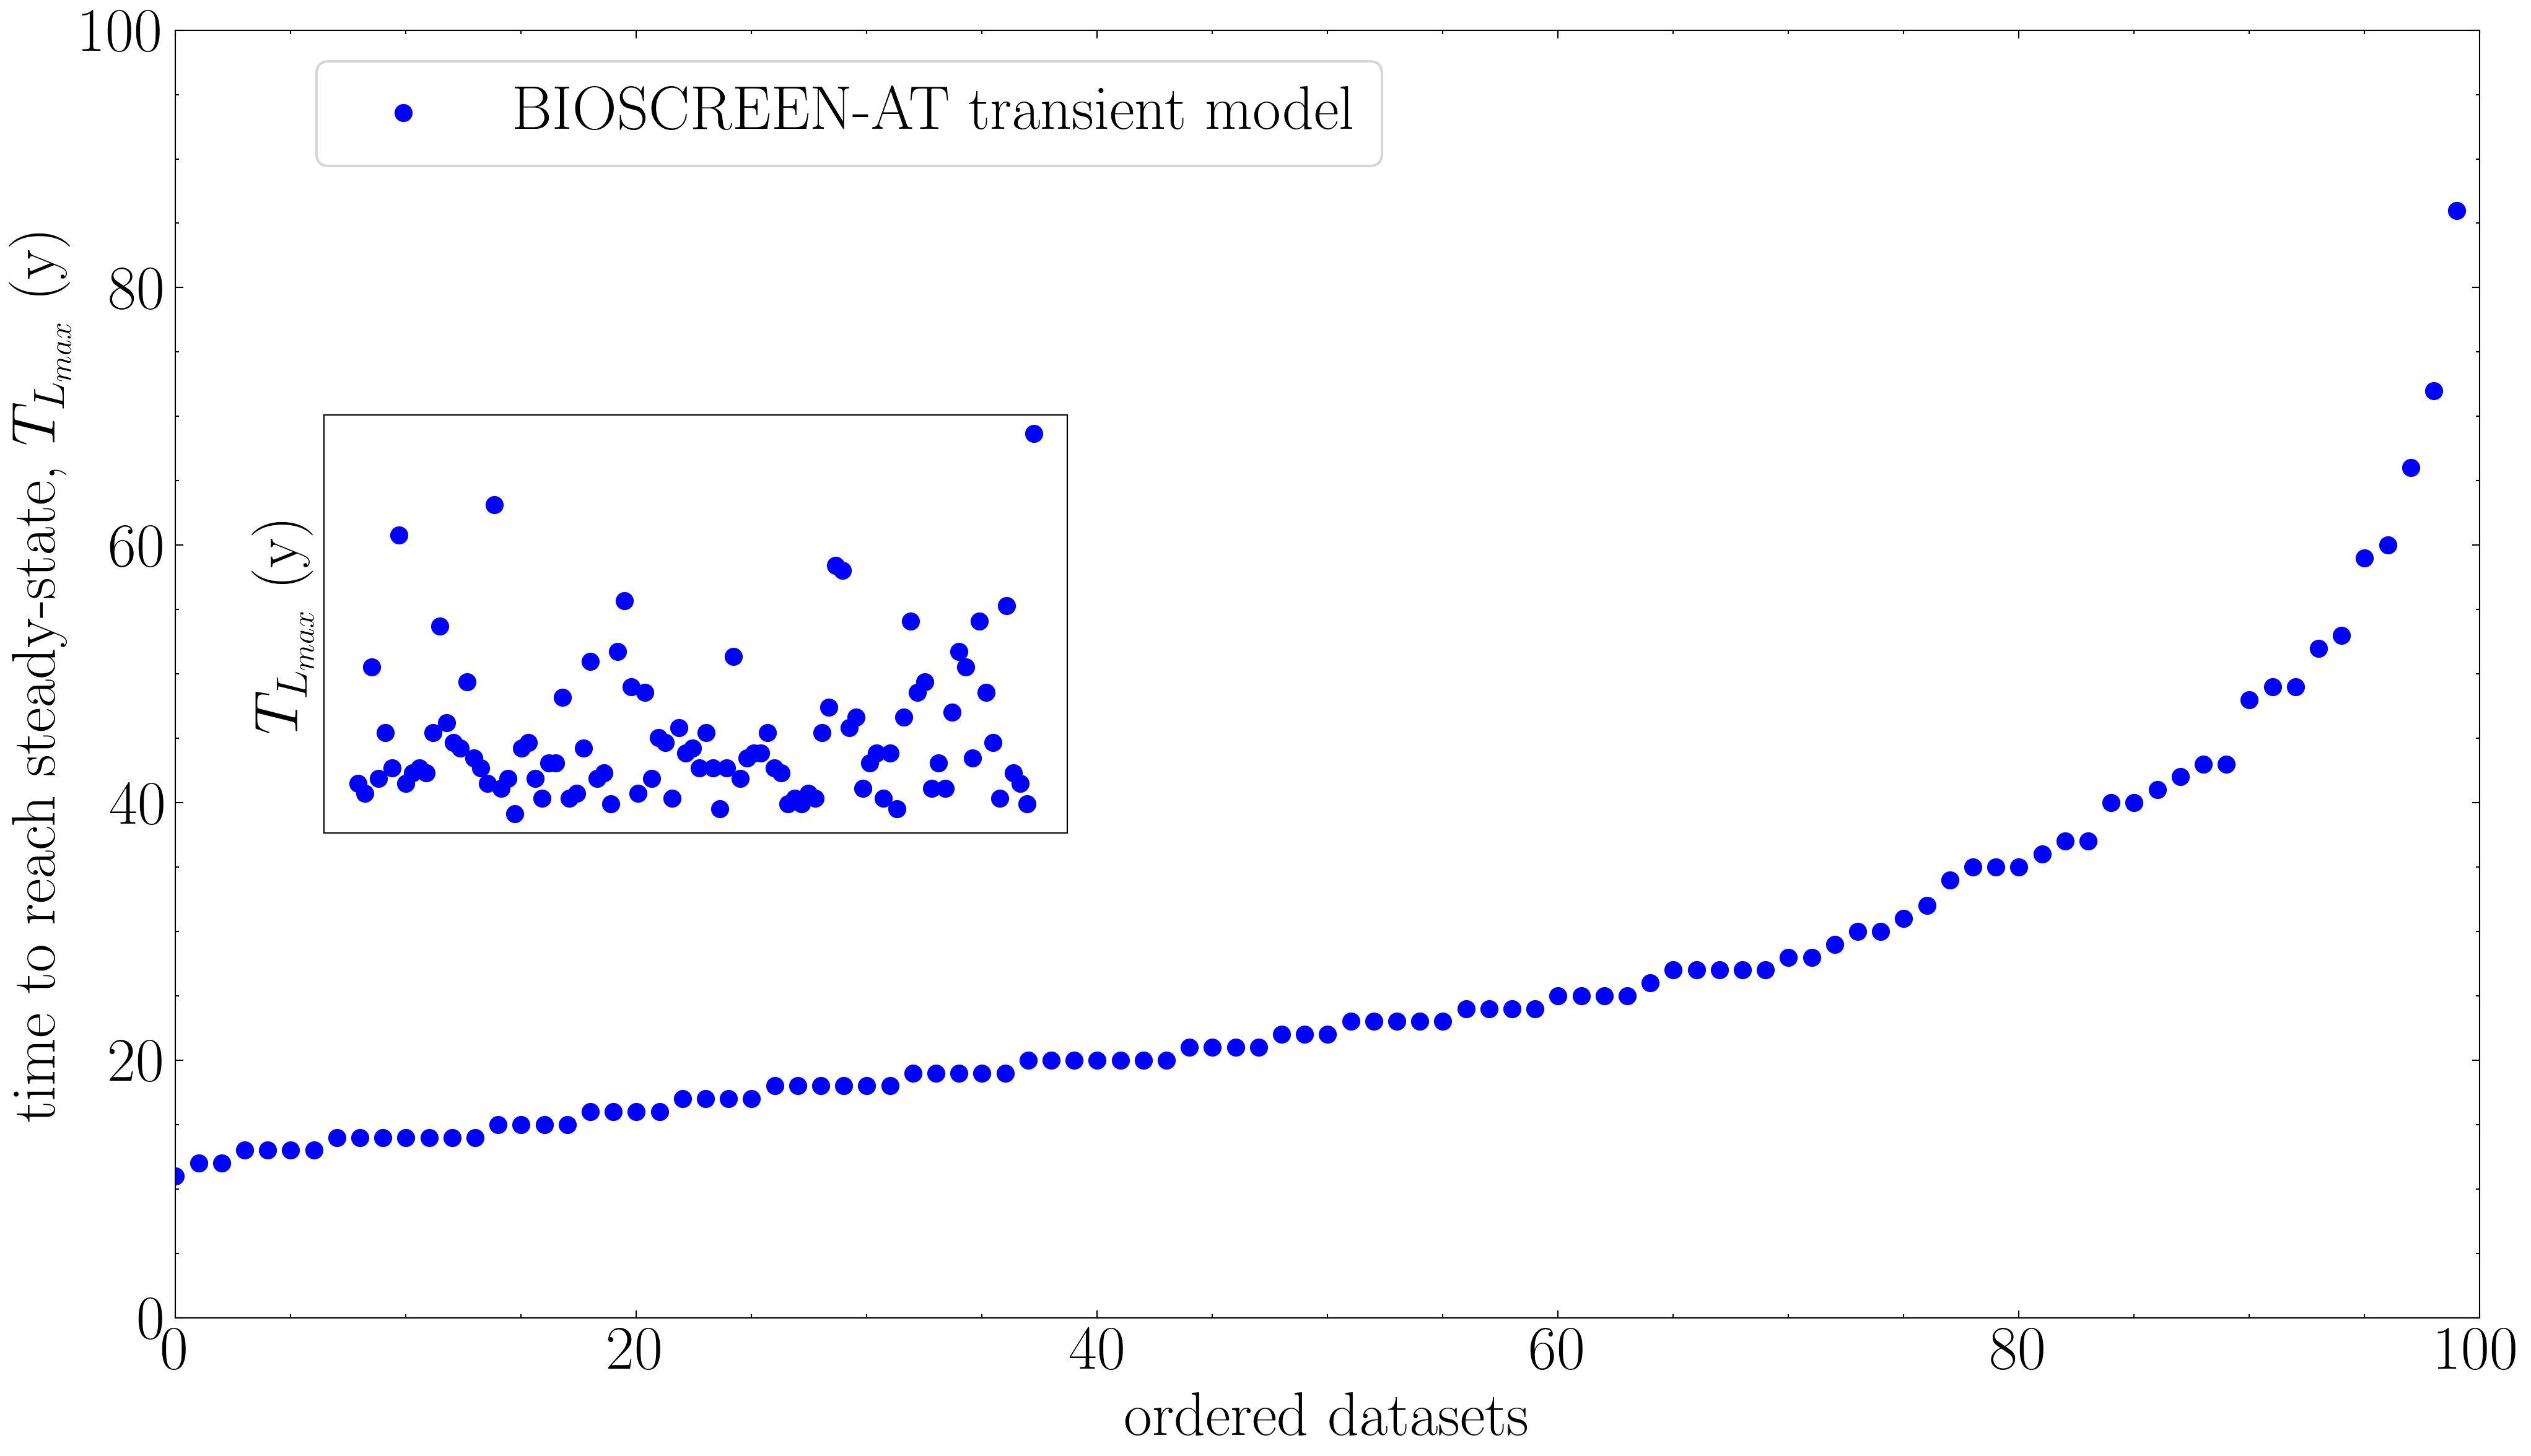

In [5]:
fig = plt.figure(figsize=(16,9), dpi=300)

ax1 = plt.axes(ylabel='time to reach steady-state, $T_{L_{max}}$ (y)', xlabel='ordered datasets')
ax1.set_xlim(0, 100)
ax1.set_ylim(0, 100)
ax1.scatter(df_all.index, df_all_time['T_Lmax'], color= 'blue', label='BIOSCREEN-AT transient model')

L=ax1.legend(frameon=True, loc='best', bbox_to_anchor=(0.287, 0.75, 0.25, 0.25))
#plt.grid()

ax2 = plt.axes([0.175, 0.4, 0.25, 0.25], ylabel='$T_{L_{max}}$ (y)')
ax2.set_xticks([])
ax2.set_yticks([])
ax2.scatter(df_all_sorted_steady.reset_index().index, df_all_sorted_steady.reset_index()['T_Lmax'], color='blue')

## Sensitivity $L_{max}$

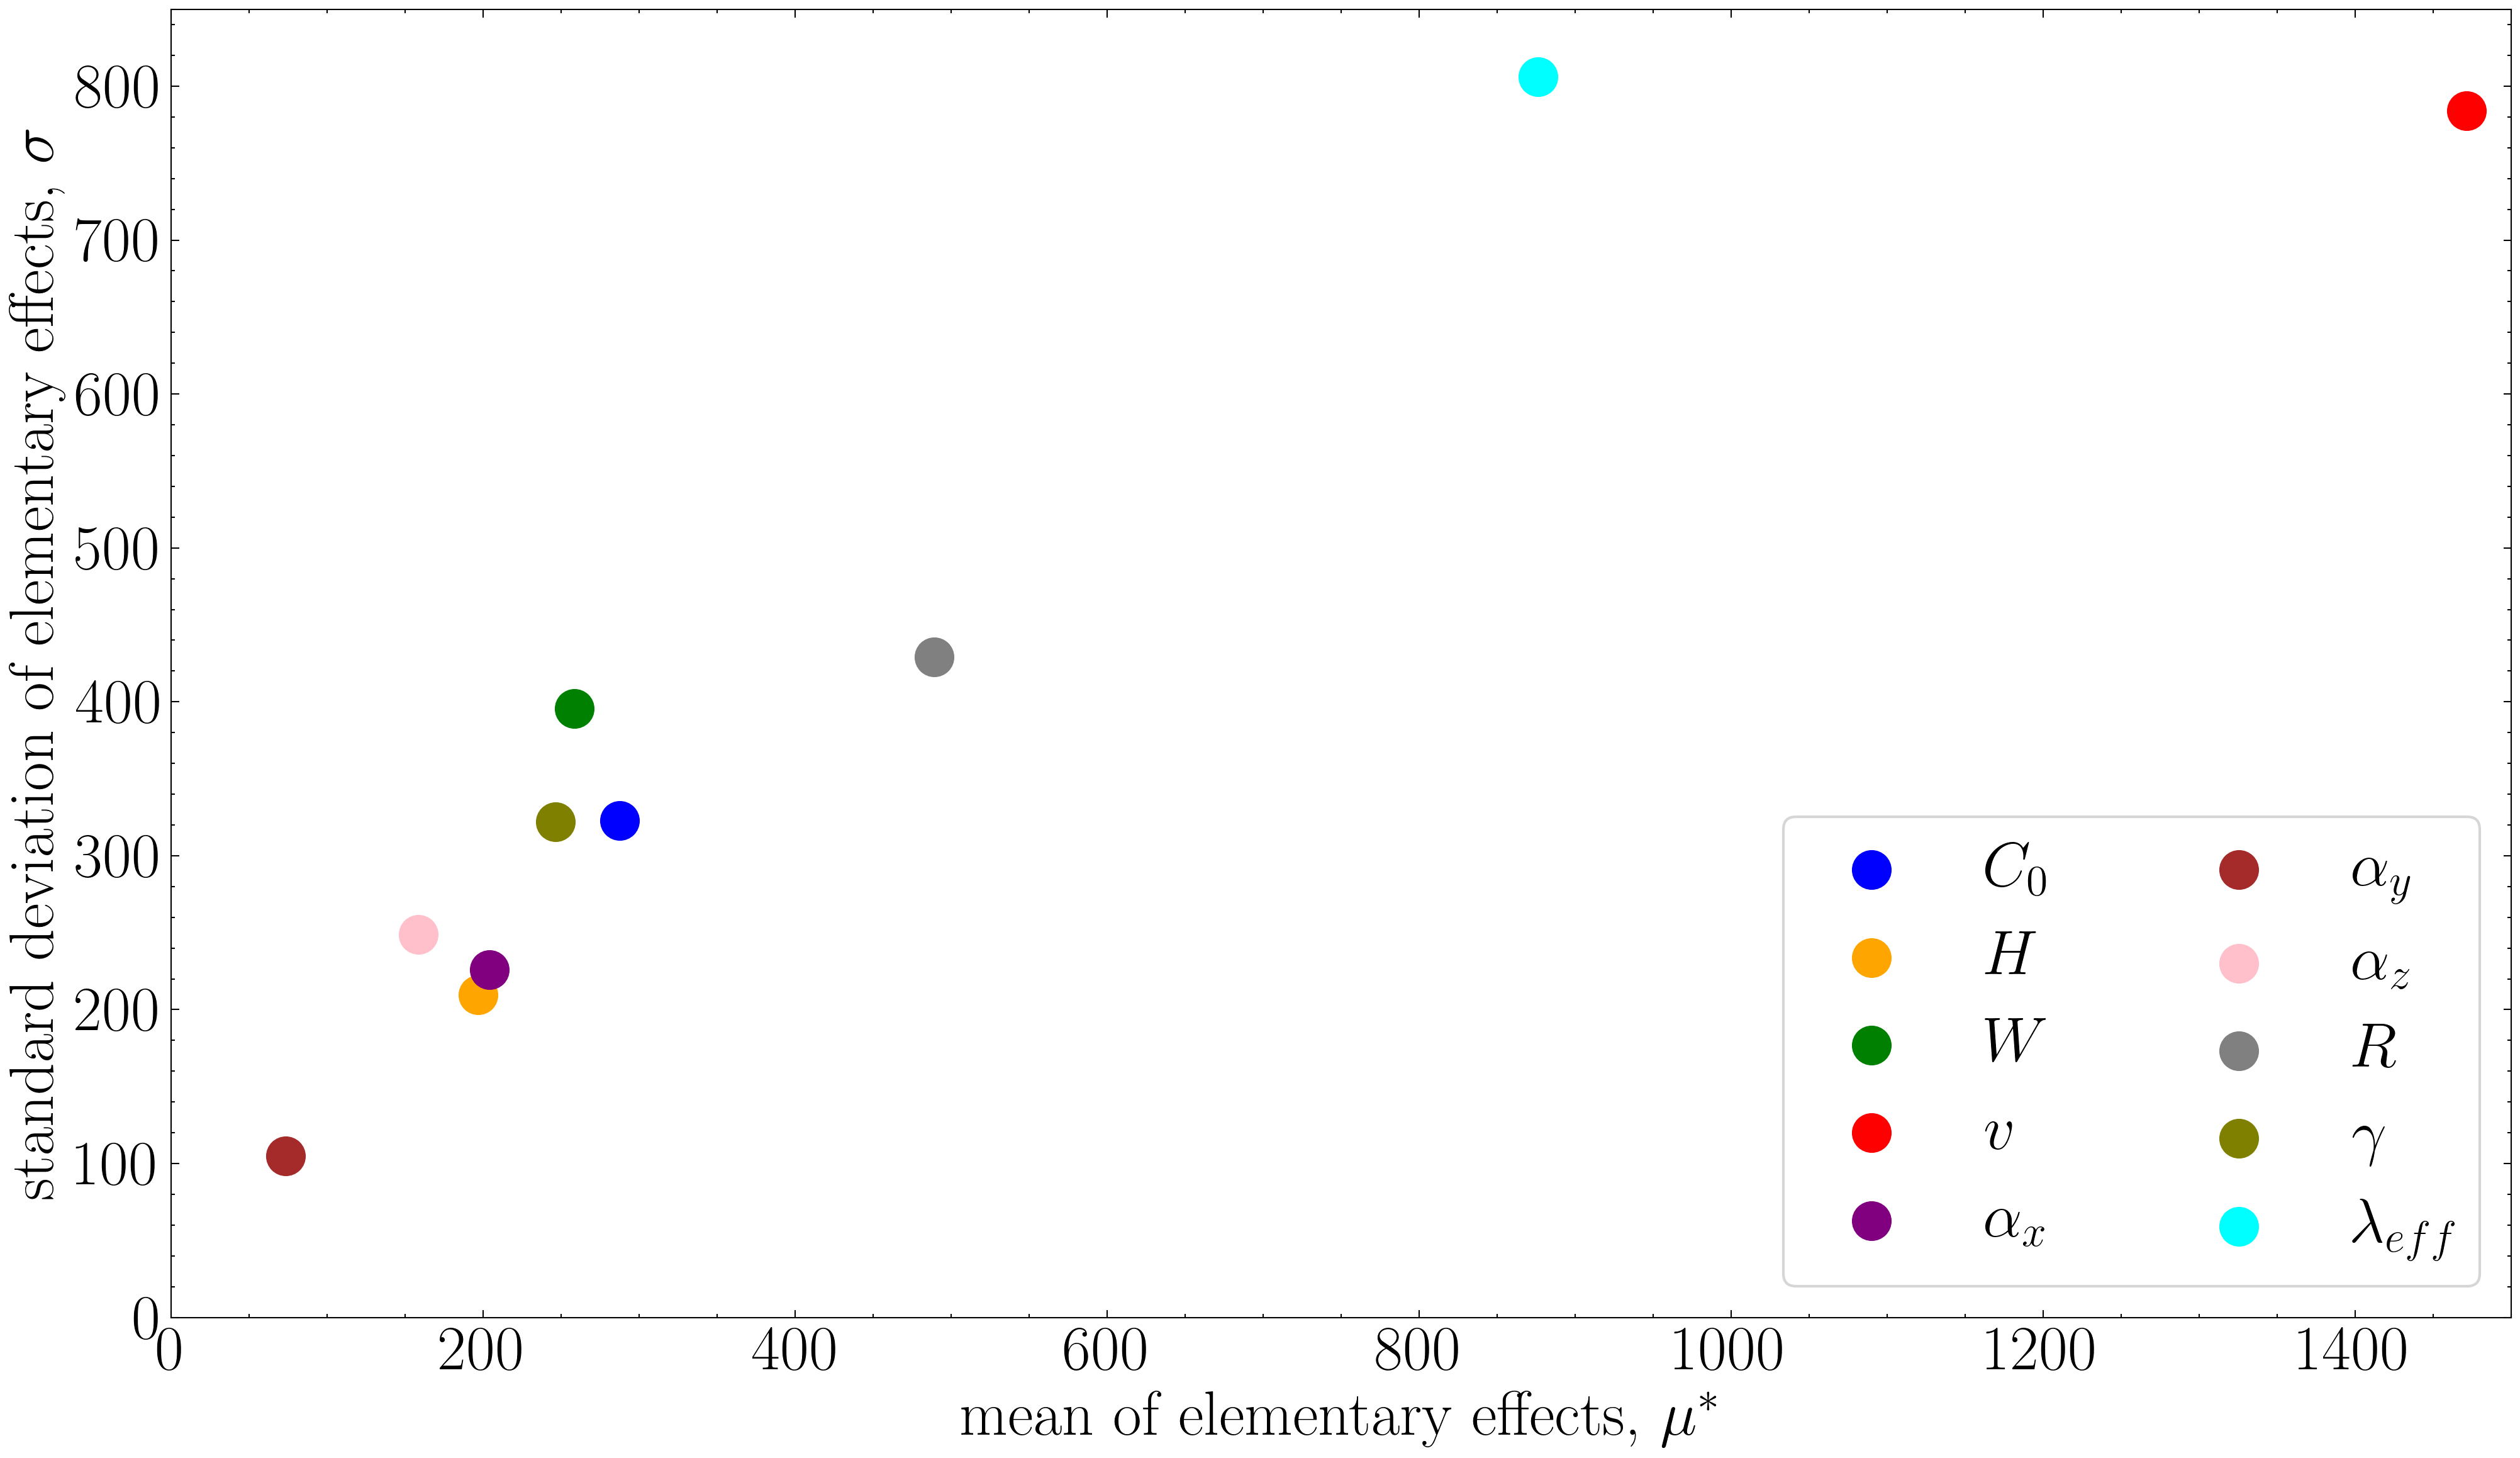

In [6]:
df_sensitivity_lmax = pd.read_csv('results_lmax',sep=" ", header = None, names = ['Parameter', 'mu_star', 'sigma'])
df_sensitivity_tmax = pd.read_csv('results_t_transient.csv',sep=',', header = None, names = ['Parameter', 'mu_star', 'sigma'])

mu_star_lmax = df_sensitivity_lmax['mu_star'].tolist()
sigma_lmax = df_sensitivity_lmax['sigma'].tolist()

fig = plt.figure(figsize=(16,9), dpi=300)

colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']
labels = [r'$C_{0}$', '$H$', '$W$', '$v$', r'$\alpha _{x}$', r'$\alpha _{y}$', r'$\alpha _{z}$', '$R$', r'$\gamma$', r'$\lambda _{eff}$']

ax = plt.axes(ylabel = 'standard deviation of elementary effects, $\sigma$', xlabel = 'mean of elementary effects, $\mu^{*}$')
ax.set_xlim(0, 1500)
ax.set_ylim(0, 850)

for i, param in enumerate(labels):
    color = colors[i]
    ax.scatter(mu_star_lmax[i], sigma_lmax[i], label=param, s=200, alpha=1, color=color)
    
#scatter=ax.scatter(df_sensitivity_lmax['mu_star'].astype(float), df_sensitivity_lmax['sigma'].astype(float), color = colors, s = 150)

# for i, txt in enumerate(labels):
#     ax.annotate(txt, (df_sensitivity_lmax['mu_star'].astype(float)[i], df_sensitivity_lmax['sigma'].astype(float)[i]))
#ax.axline((0, 0), slope=1, linewidth = 1, color = 'black', linestyle='--')
ax.legend(frameon=True, ncol = 2, loc='lower right') #handles=scatter.legend_elements()[0], labels = labels
#ax.grid()
plt.show()

## Sensitivity $T_{L_{max}}$

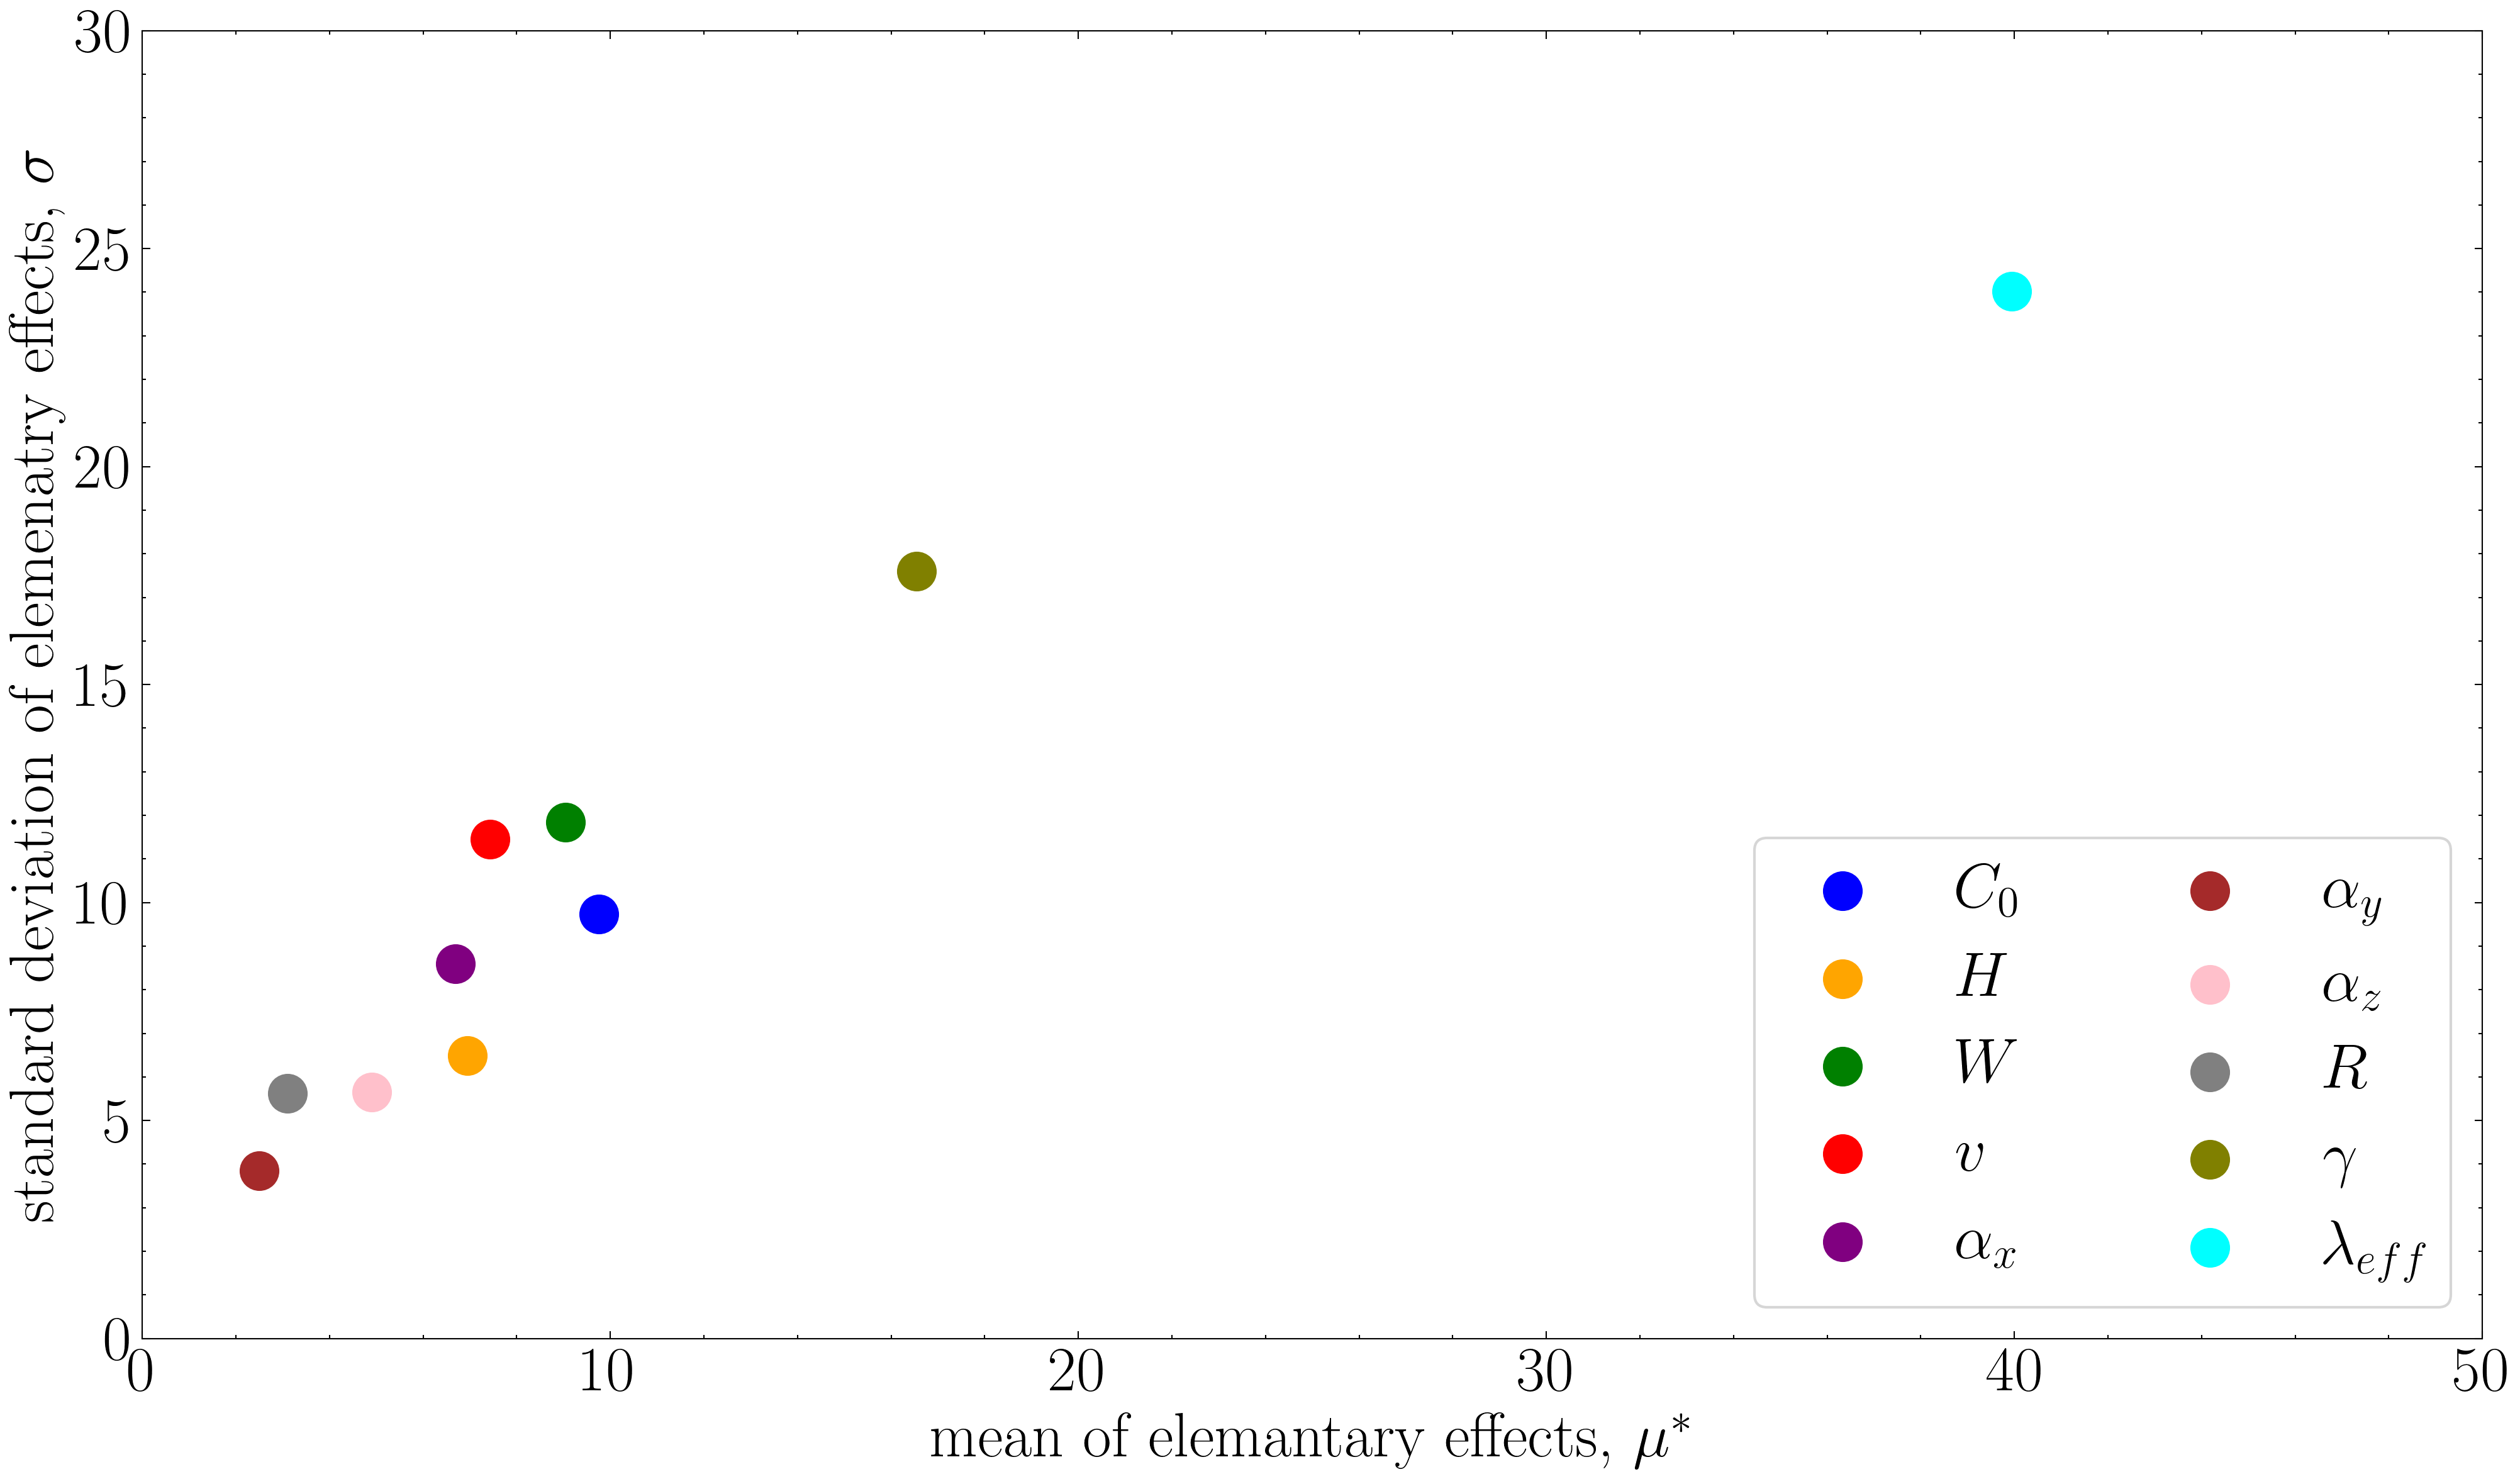

In [7]:
df_sensitivity_lmax = pd.read_csv('results_lmax',sep=" ", header = None, names = ['Parameter', 'mu_star', 'sigma'])
df_sensitivity_tmax = pd.read_csv('results_t_transient.csv',sep=',', header = None, names = ['Parameter', 'mu_star', 'sigma'])

mu_star_tmax = df_sensitivity_tmax['mu_star'].tolist()
sigma_tmax = df_sensitivity_tmax['sigma'].tolist()

fig = plt.figure(figsize=(16,9), dpi=300)

colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']
labels = [r'$C_{0}$', '$H$', '$W$', '$v$', r'$\alpha _{x}$', r'$\alpha _{y}$', r'$\alpha _{z}$', '$R$', r'$\gamma$', r'$\lambda _{eff}$']

ax = plt.axes(ylabel = 'standard deviation of elemenatry effects, $\sigma$', xlabel = 'mean of elemantary effects, $\mu^{*}$')
ax.set_xlim(0, 50)
ax.set_ylim(0, 30)

for i, param in enumerate(labels):
    color = colors[i]
    ax.scatter(mu_star_tmax[i], sigma_tmax[i], label=param, s=200, alpha=1, color=color)
    
#scatter=ax.scatter(df_sensitivity_lmax['mu_star'].astype(float), df_sensitivity_lmax['sigma'].astype(float), color = colors, s = 150)

# for i, txt in enumerate(labels):
#     ax.annotate(txt, (df_sensitivity_lmax['mu_star'].astype(float)[i], df_sensitivity_lmax['sigma'].astype(float)[i]))
#ax.axline((0, 0), slope=1, linewidth = 1, color = 'black', linestyle='--')
ax.legend(frameon=True, ncol = 2, loc='lower right') #handles=scatter.legend_elements()[0], labels = labels
#ax.grid()
plt.show()

## Random Scattered Parameter $\lambda_{eff}$

Text(0, 0.5, 'first order degredation, $\\lambda_{eff}$')

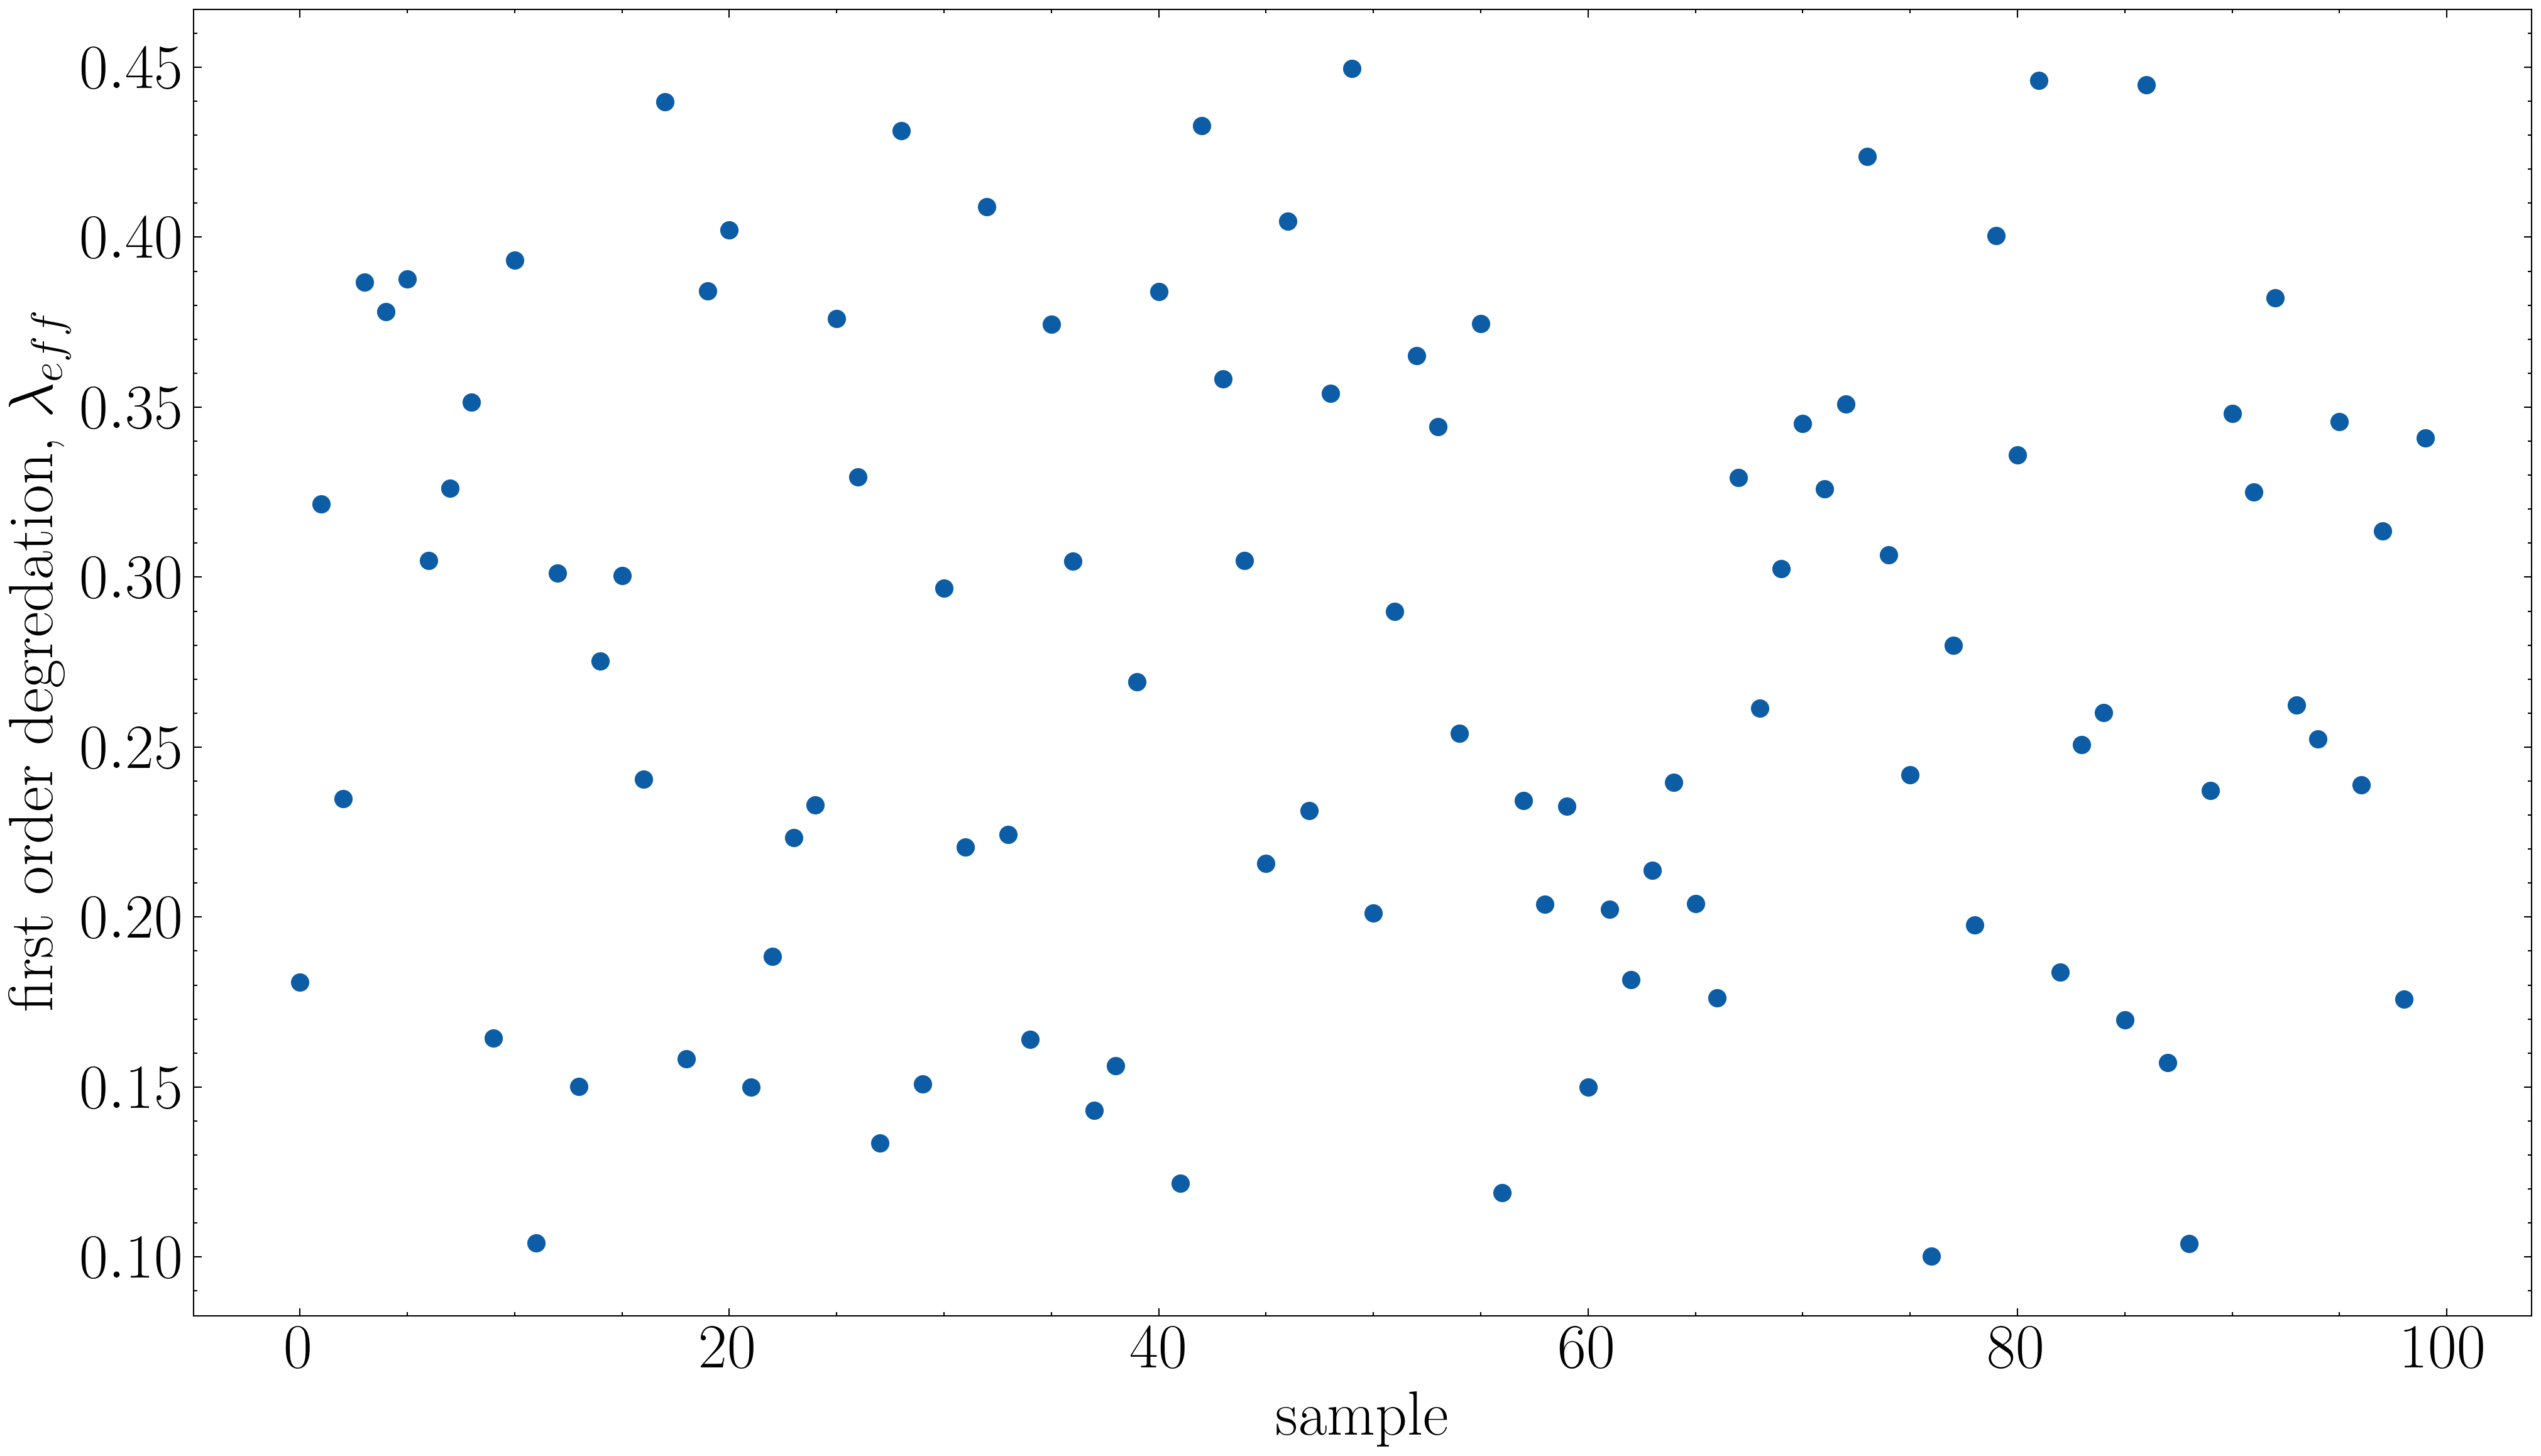

In [8]:
fig = plt.figure(figsize=(16,9), dpi=300)
Lambda=df_dataset['Lambda']
x = range(0,100)
plt.scatter(x, Lambda)
plt.xlabel('sample')
plt.ylabel('first order degredation, $\lambda_{eff}$')

## Plotting of Polynomial Results

In [9]:
#Training Data
data = pd.read_csv('Dataset_Seed_3424.txt', header = None, names = ['C0','H','W','v','alx','aly','alz','R','Gamma','Lambda'], sep=' ')
plumeresults = pd.read_csv('Lmax_transient_Seed_3424.txt', header = None, names = ['Lmax', 'T_Lmax'], sep = ' ')

gamma = data['Gamma']
gamma_2 = gamma**2
lambda_eff = data['Lambda']
lambda_eff_2 = lambda_eff**2
lambda_eff_gamma = lambda_eff*gamma
v = data['v']
v_2 = v**2
lambda_eff_v = lambda_eff*v

lmax = plumeresults['Lmax']
t_lmax = plumeresults['T_Lmax']

ones = np.ones(len(gamma))

Params_T = np.column_stack((ones, lambda_eff, gamma, lambda_eff_2, gamma_2, lambda_eff_gamma))
Params_L = np.column_stack((ones, lambda_eff, v, lambda_eff_2, v_2, lambda_eff_v))

Polynomial_coeff_L = np.linalg.lstsq(Params_L,lmax,rcond=None)[0]
Polynomial_coeff_T = np.linalg.lstsq(Params_T,t_lmax,rcond=None)[0]
#Polynomial_coeff_T = [51, -47.998, -49.151, 5.2346, 41.988, 7.886]  #Coefficients computed by Joy
print(Polynomial_coeff_L, Polynomial_coeff_T)

[ 8.40646807e+02 -5.80870493e+03  4.99822895e+01  1.03383927e+04
 -2.41713053e-02 -8.56170219e+01] [ 113.99964084 -398.10418173  -47.17626404  444.4661549    14.72833806
   67.70759628]


In [10]:
#%% Test Data

data = pd.read_csv('Dataset_Seed_19980622', header = None, sep = ' ', names = ['C0','H','W','v','alx','aly','alz','R','Gamma','Lambda'])
data2 = pd.read_csv('Lmax_steady_Seed_19980622', header = None, sep = ' ', names = ['Lmax'])
plumeresults = pd.read_csv('Lmax_transient_Seed_19980622', header = None, sep = ' ', names = ['Lmax', 'T_Lmax'])

gamma = data['Gamma']
lambda_eff = data['Lambda']
v = data['v']

lmax = plumeresults['Lmax']
lmax_steady = data2.astype(float)
t_lmax = plumeresults['T_Lmax']

In [11]:
#%%

L = Polynomial_coeff_L[0] + lambda_eff*Polynomial_coeff_L[1] + v*Polynomial_coeff_L[2] + lambda_eff**2*Polynomial_coeff_L[3] + v**2*Polynomial_coeff_L[4] + lambda_eff*v*Polynomial_coeff_L[5]
t = Polynomial_coeff_T[0] + lambda_eff*Polynomial_coeff_T[1] + gamma*Polynomial_coeff_T[2] + lambda_eff**2*Polynomial_coeff_T[3] + gamma**2*Polynomial_coeff_T[4] + lambda_eff*gamma*Polynomial_coeff_T[5]

## Comparison of calculated Plume Length

NRMSE_Lmax = 0.32264652665698845
NRMSE_Tlmax = 0.2264163484428703


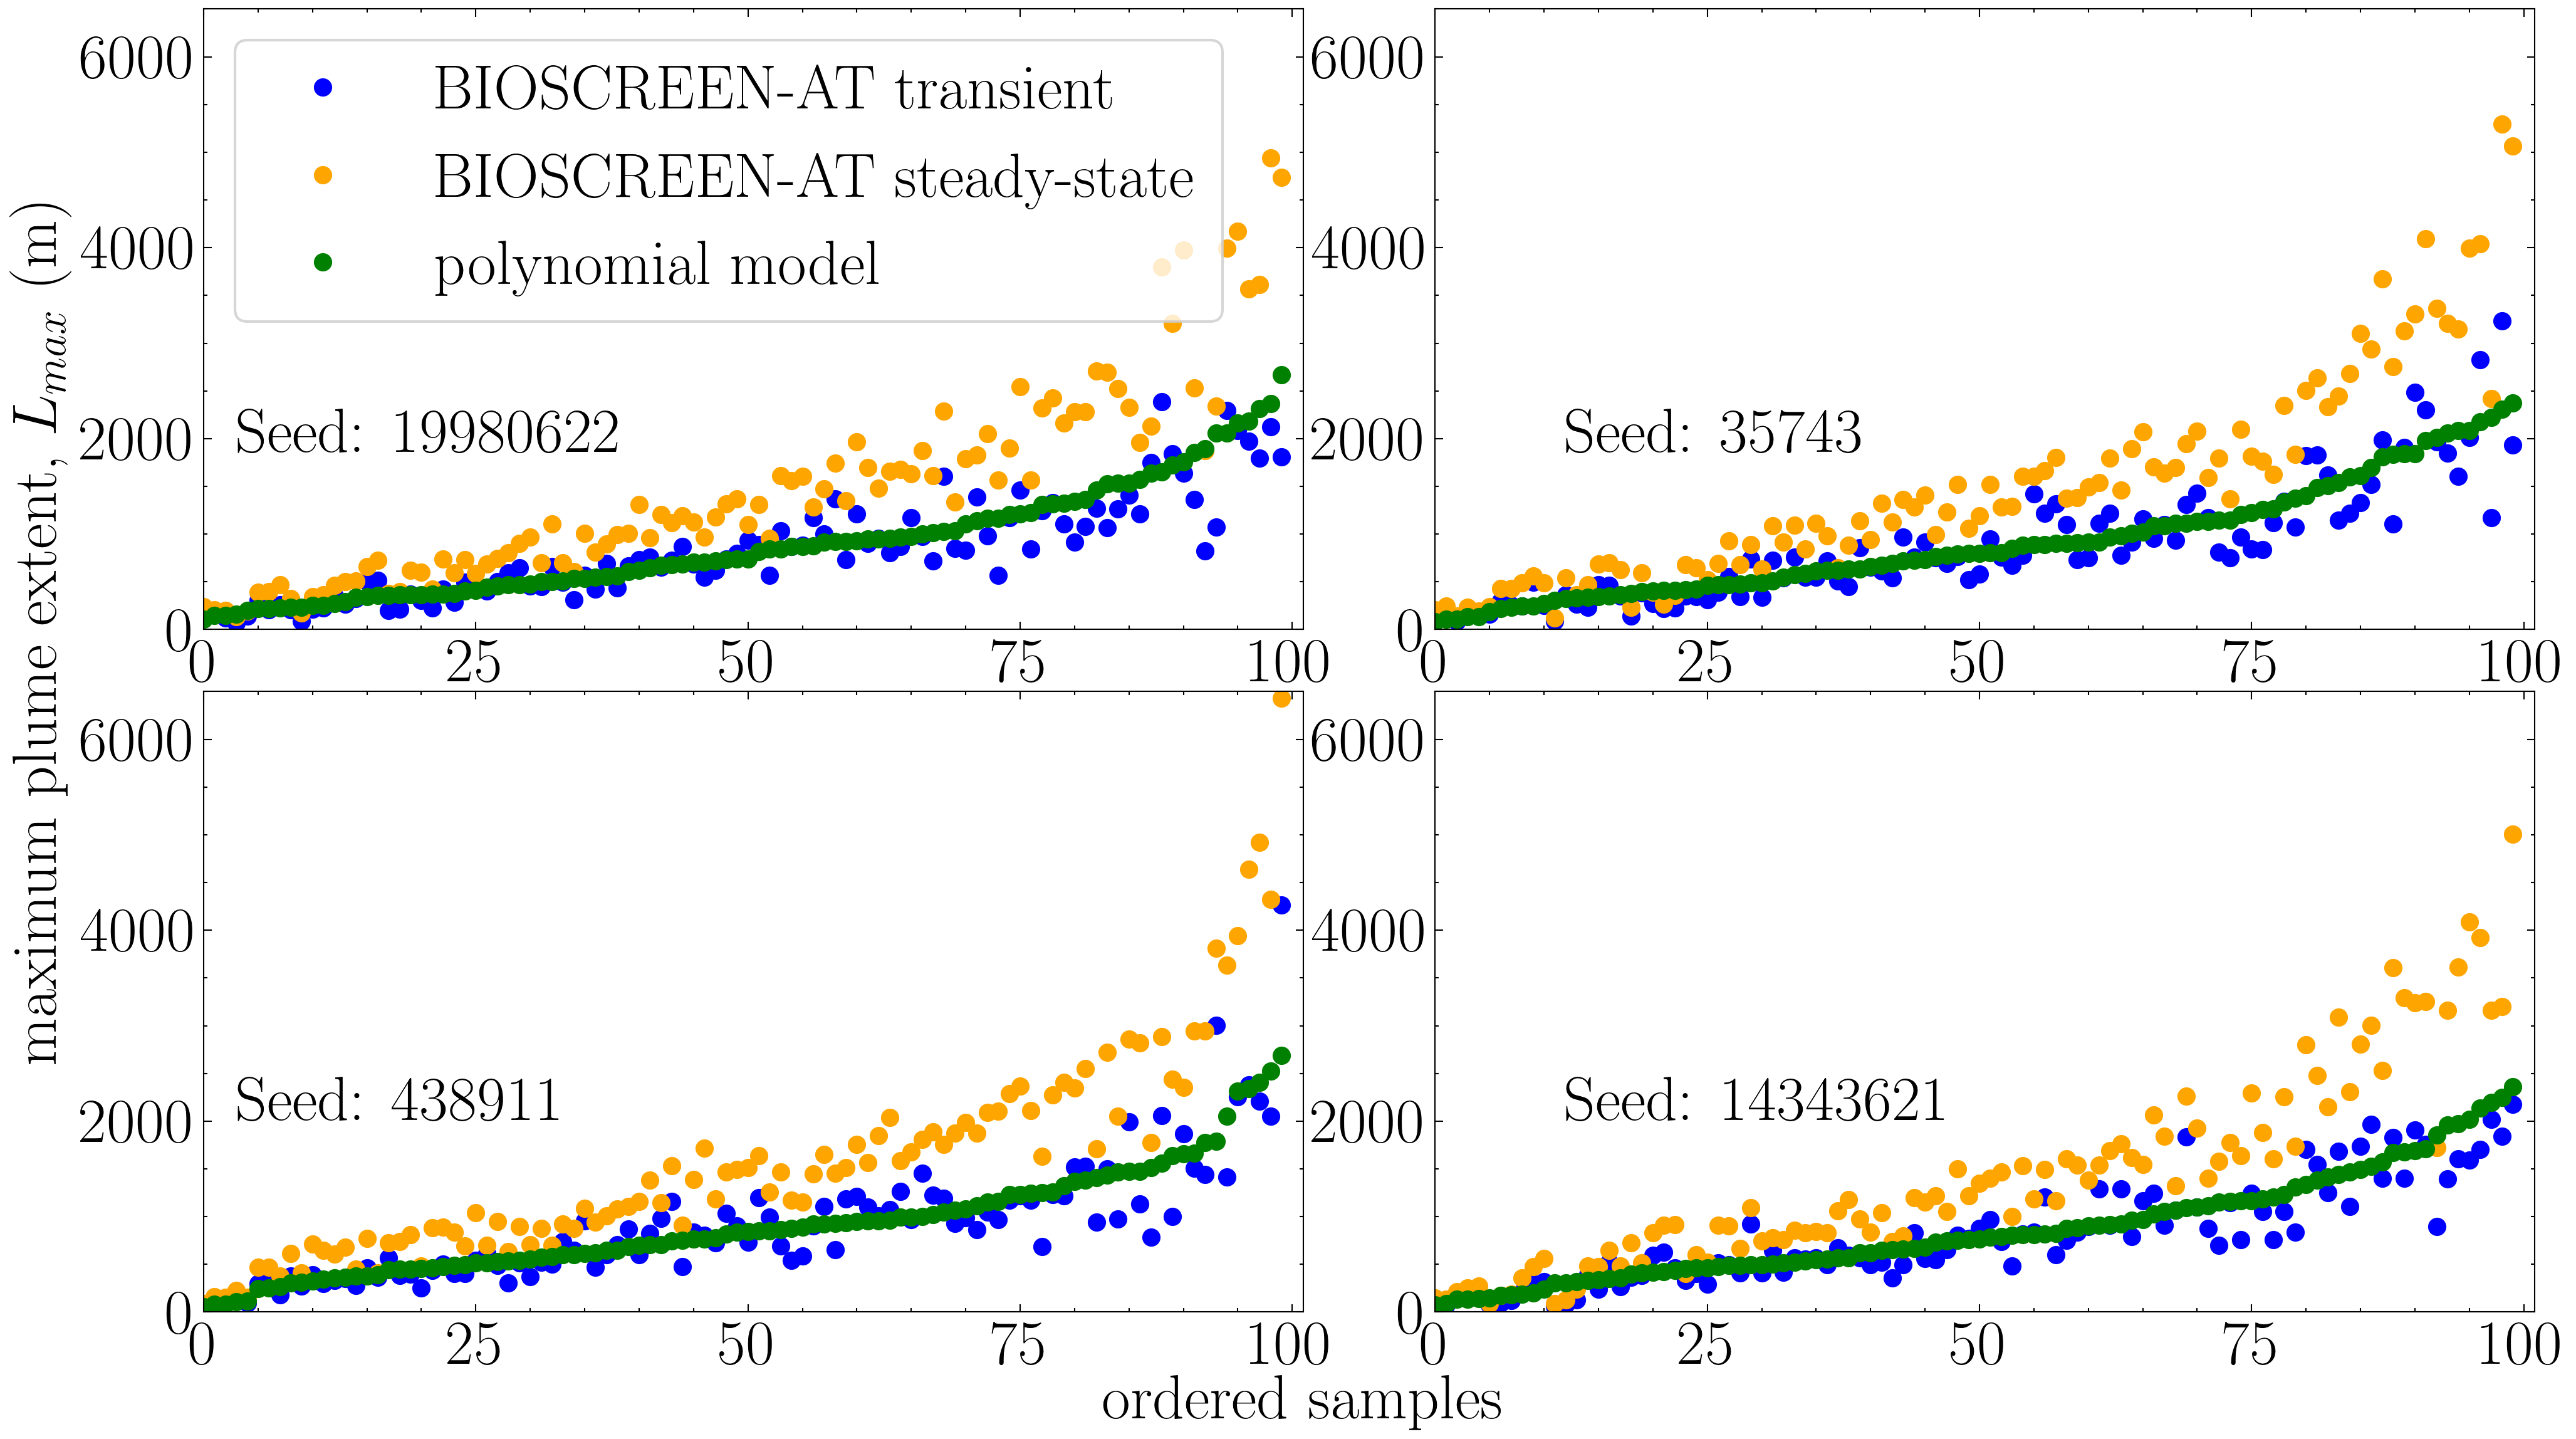

In [12]:
Plume_Length = np.column_stack((lmax, L, lmax_steady))
Time = np.column_stack((t_lmax, t))

Plume_Length_sorted = Plume_Length[Plume_Length[:,1].argsort()]
Time_sorted = Time[Time[:,1].argsort()]

NRMSE_L = np.sqrt(mean_squared_error(lmax,L))/np.mean(lmax)         #normalized by mean of lmax
print('NRMSE_Lmax =', NRMSE_L)
NRMSE_T = np.sqrt(mean_squared_error(t_lmax,t))/np.mean(t_lmax)     #normalized by mean of T_lmax
print('NRMSE_Tlmax =',NRMSE_T)

#plt.style.use('science')
plt.rc('text', usetex=True)
mpl.rcParams.update({'lines.linewidth':10, 'font.size':24})

figure, axis = plt.subplots(2,2, figsize=(16,9), dpi=300, gridspec_kw = {'wspace':0.12, 'hspace':0.1})
plt.subplots_adjust(wspace=None, hspace=None)

color = ['blue', 'green', 'orange']
axis[0,0].plot(Plume_Length_sorted[:,0], 'o',  color = color[0], label='BIOSCREEN-AT transient') #, 'Polynomial Model', 'BIOSCREEN Steady-State'
axis[0,0].plot(Plume_Length_sorted[:,2], 'o',  color = color[2], label='BIOSCREEN-AT steady-state')
axis[0,0].plot(Plume_Length_sorted[:,1], 'o',  color = color[1], label='polynomial model')
#axis[0,0].grid(True)
plt.text(-110,9000,'Seed: 19980622')

data = pd.read_csv('Dataset_Seed_35743.txt', header = None, sep = ' ', names = ['C0','H','W','v','alx','aly','alz','R','Gamma','Lambda'])
data2 = pd.read_csv('Lmax_steady_Seed_35743.txt', header = None, sep = ' ', names = ['Lmax'])
plumeresults = pd.read_csv('Lmax_transient_Seed_35743.txt', header = None, sep = ' ', names = ['Lmax', 'T_Lmax'])

gamma = data['Gamma']
lambda_eff = data['Lambda']
v = data['v']
lmax = plumeresults['Lmax']
lmax_steady = data2.astype(float)
t_lmax = plumeresults['T_Lmax']
L = Polynomial_coeff_L[0] + lambda_eff*Polynomial_coeff_L[1] + v*Polynomial_coeff_L[2] + lambda_eff**2*Polynomial_coeff_L[3] + v**2*Polynomial_coeff_L[4] + lambda_eff*v*Polynomial_coeff_L[5]
t = Polynomial_coeff_T[0] + lambda_eff*Polynomial_coeff_T[1] + gamma*Polynomial_coeff_T[2] + lambda_eff**2*Polynomial_coeff_T[3] + gamma**2*Polynomial_coeff_T[4] + lambda_eff*gamma*Polynomial_coeff_T[5]
Plume_Length = np.column_stack((lmax, L, lmax_steady))
Time = np.column_stack((t_lmax, t))
Plume_Length_sorted = Plume_Length[Plume_Length[:,1].argsort()]
Time_sorted = Time[Time[:,1].argsort()]

color = ['blue', 'green', 'orange']
axis[0,1].plot(Plume_Length_sorted[:,0], 'o',  color = color[0], label='BIOSCREEN-AT transient model') #, 'Polynomial Model', 'BIOSCREEN Steady-State'
axis[0,1].plot(Plume_Length_sorted[:,2], 'o',  color = color[2], label='BIOSCREEN-AT steady-state model')
axis[0,1].plot(Plume_Length_sorted[:,1], 'o',  color = color[1], label='polynomial model')
#axis[0,1].grid(True)
plt.text(12,9000,'Seed: 35743')

data = pd.read_csv('Dataset_Seed_438911.txt', header = None, sep = ' ', names = ['C0','H','W','v','alx','aly','alz','R','Gamma','Lambda'])
data2 = pd.read_csv('Lmax_steady_Seed_438911.txt', header = None, sep = ' ', names = ['Lmax'])
plumeresults = pd.read_csv('Lmax_transient_Seed_438911.txt', header = None, sep = ' ', names = ['Lmax', 'T_Lmax'])

gamma = data['Gamma']
lambda_eff = data['Lambda']
v = data['v']
lmax = plumeresults['Lmax']
lmax_steady = data2.astype(float)
t_lmax = plumeresults['T_Lmax']
L = Polynomial_coeff_L[0] + lambda_eff*Polynomial_coeff_L[1] + v*Polynomial_coeff_L[2] + lambda_eff**2*Polynomial_coeff_L[3] + v**2*Polynomial_coeff_L[4] + lambda_eff*v*Polynomial_coeff_L[5]
t = Polynomial_coeff_T[0] + lambda_eff*Polynomial_coeff_T[1] + gamma*Polynomial_coeff_T[2] + lambda_eff**2*Polynomial_coeff_T[3] + gamma**2*Polynomial_coeff_T[4] + lambda_eff*gamma*Polynomial_coeff_T[5]
Plume_Length = np.column_stack((lmax, L, lmax_steady))
Time = np.column_stack((t_lmax, t))
Plume_Length_sorted = Plume_Length[Plume_Length[:,1].argsort()]
Time_sorted = Time[Time[:,1].argsort()]

color = ['blue', 'green', 'orange']
axis[1,0].plot(Plume_Length_sorted[:,0], 'o',  color = color[0], label='BIOSCREEN-AT transient model') #, 'Polynomial Model', 'BIOSCREEN Steady-State'
axis[1,0].plot(Plume_Length_sorted[:,2], 'o',  color = color[2], label='BIOSCREEN-AT steady-state model')
axis[1,0].plot(Plume_Length_sorted[:,1], 'o',  color = color[1], label='polynomial model')
#axis[1,0].grid(True)
plt.text(-110,2000,'Seed: 438911')

data = pd.read_csv('Dataset_Seed_14343621.txt', header = None, sep = ' ', names = ['C0','H','W','v','alx','aly','alz','R','Gamma','Lambda'])
data2 = pd.read_csv('Lmax_steady_Seed_14343621.txt', header = None, sep = ' ', names = ['Lmax'])
plumeresults = pd.read_csv('Lmax_transient_Seed_14343621.txt', header = None, sep = ' ', names = ['Lmax', 'T_Lmax'])

gamma = data['Gamma']
lambda_eff = data['Lambda']
v = data['v']
lmax = plumeresults['Lmax']
lmax_steady = data2.astype(float)
t_lmax = plumeresults['T_Lmax']
L = Polynomial_coeff_L[0] + lambda_eff*Polynomial_coeff_L[1] + v*Polynomial_coeff_L[2] + lambda_eff**2*Polynomial_coeff_L[3] + v**2*Polynomial_coeff_L[4] + lambda_eff*v*Polynomial_coeff_L[5]
t = Polynomial_coeff_T[0] + lambda_eff*Polynomial_coeff_T[1] + gamma*Polynomial_coeff_T[2] + lambda_eff**2*Polynomial_coeff_T[3] + gamma**2*Polynomial_coeff_T[4] + lambda_eff*gamma*Polynomial_coeff_T[5]
Plume_Length = np.column_stack((lmax, L, lmax_steady))
Time = np.column_stack((t_lmax, t))
Plume_Length_sorted = Plume_Length[Plume_Length[:,1].argsort()]
Time_sorted = Time[Time[:,1].argsort()]

color = ['blue', 'green', 'orange']
axis[1,1].plot(Plume_Length_sorted[:,0], 'o',  color = color[0], label='BIOSCREEN-AT transient model') #, 'Polynomial Model', 'BIOSCREEN Steady-State'
axis[1,1].plot(Plume_Length_sorted[:,2], 'o',  color = color[2], label='BIOSCREEN-AT steady-state model')
axis[1,1].plot(Plume_Length_sorted[:,1], 'o',  color = color[1], label='polynomial model')
#axis[1,1].grid(True)
plt.text(12,2000,'Seed: 14343621')

# plt.setp(plt.gcf().get_axes()[0].get_xticklabels(), visible=False)
# plt.setp(plt.gcf().get_axes()[1].get_xticklabels(), visible=False)
# plt.setp(plt.gcf().get_axes()[2].get_xticklabels(), visible=False)
# plt.setp(plt.gcf().get_axes()[3].get_xticklabels(), visible=False)

# plt.setp(plt.gcf().get_axes()[1].get_yticklabels(), visible=False)
# plt.setp(plt.gcf().get_axes()[3].get_yticklabels(), visible=False)

plt.setp(plt.gcf().get_axes(), xlim=[0,101], ylim = [0,6500])
axis[0,0].legend(frameon=True)
axis[0,0].set_ylabel('maximum plume extent, $L_{max}$ (m)')
axis[0,0].yaxis.set_label_coords(-0.12, 0, transform=None)
axis[0,0].set_xlabel('ordered samples')
axis[0,0].xaxis.set_label_coords(1, -1.2, transform=None)

## Comparison of calculated steady-state time

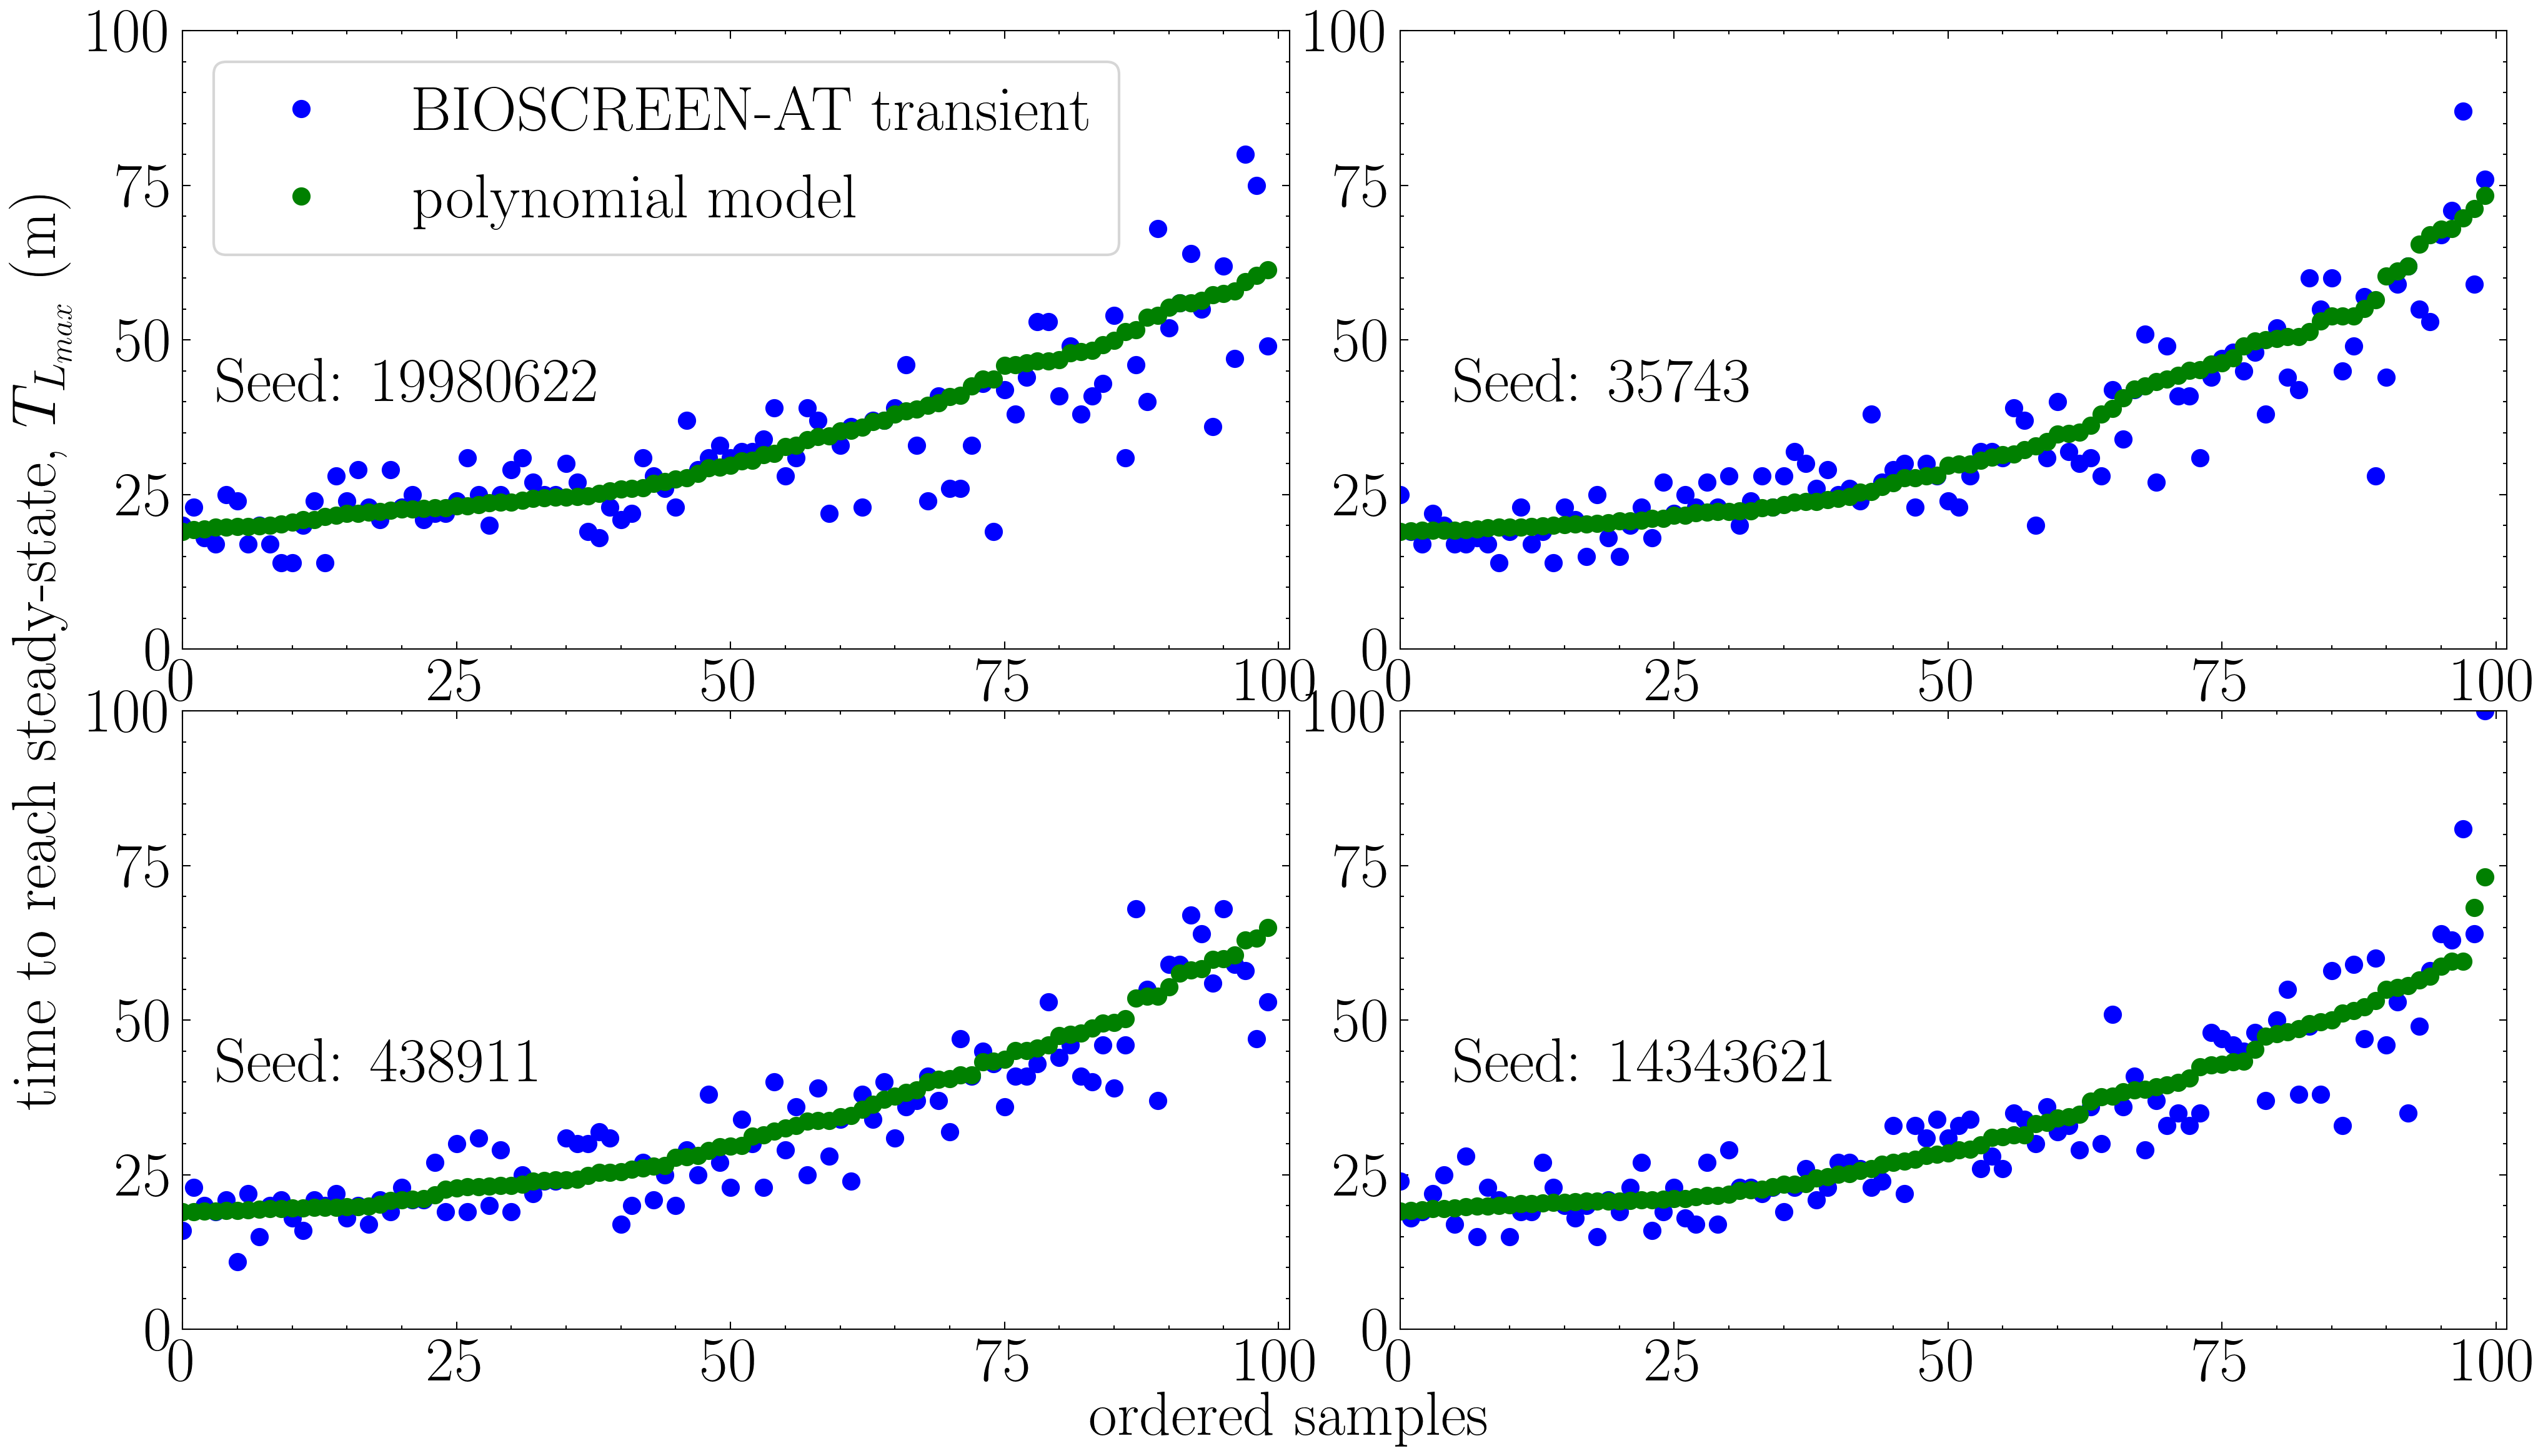

In [13]:
data = pd.read_csv('Dataset_Seed_19980622', header = None, sep = ' ', names = ['C0','H','W','v','alx','aly','alz','R','Gamma','Lambda'])
data2 = pd.read_csv('Lmax_steady_Seed_19980622', header = None, sep = ' ', names = ['Lmax'])
plumeresults = pd.read_csv('Lmax_transient_Seed_19980622', header = None, sep = ' ', names = ['Lmax', 'T_Lmax'])
gamma = data['Gamma']
lambda_eff = data['Lambda']
v = data['v']
lmax = plumeresults['Lmax']
lmax_steady = data2.astype(float)
t_lmax = plumeresults['T_Lmax']
L = Polynomial_coeff_L[0] + lambda_eff*Polynomial_coeff_L[1] + v*Polynomial_coeff_L[2] + lambda_eff**2*Polynomial_coeff_L[3] + v**2*Polynomial_coeff_L[4] + lambda_eff*v*Polynomial_coeff_L[5]
t = Polynomial_coeff_T[0] + lambda_eff*Polynomial_coeff_T[1] + gamma*Polynomial_coeff_T[2] + lambda_eff**2*Polynomial_coeff_T[3] + gamma**2*Polynomial_coeff_T[4] + lambda_eff*gamma*Polynomial_coeff_T[5]
Plume_Length = np.column_stack((lmax, L, lmax_steady))
Time = np.column_stack((t_lmax, t))
Plume_Length_sorted = Plume_Length[Plume_Length[:,1].argsort()]
Time_sorted = Time[Time[:,1].argsort()]
#plt.style.use('science')
plt.rc('text', usetex=True)
mpl.rcParams.update({'lines.linewidth':10, 'font.size':24})

figure, axis = plt.subplots(2,2, figsize=(16,9), dpi=300, gridspec_kw = {'wspace':0.1, 'hspace':0.1})
plt.subplots_adjust(wspace=None, hspace=None)

color = ['blue', 'green', 'orange']
axis[0,0].plot(Time_sorted[:,0], 'o',  color = 'blue', label='BIOSCREEN-AT transient') #, 'Polynomial Model', 'BIOSCREEN Steady-State'
axis[0,0].plot(Time_sorted[:,1], 'o',  color = 'green', label='polynomial model')
#axis[0,0].grid(True)
plt.text(-108, 150,'Seed: 19980622')

data = pd.read_csv('Dataset_Seed_35743.txt', header = None, sep = ' ', names = ['C0','H','W','v','alx','aly','alz','R','Gamma','Lambda'])
data2 = pd.read_csv('Lmax_steady_Seed_35743.txt', header = None, sep = ' ', names = ['Lmax'])
plumeresults = pd.read_csv('Lmax_transient_Seed_35743.txt', header = None, sep = ' ', names = ['Lmax', 'T_Lmax'])

gamma = data['Gamma']
lambda_eff = data['Lambda']
v = data['v']
lmax = plumeresults['Lmax']
lmax_steady = data2.astype(float)
t_lmax = plumeresults['T_Lmax']
L = Polynomial_coeff_L[0] + lambda_eff*Polynomial_coeff_L[1] + v*Polynomial_coeff_L[2] + lambda_eff**2*Polynomial_coeff_L[3] + v**2*Polynomial_coeff_L[4] + lambda_eff*v*Polynomial_coeff_L[5]
t = Polynomial_coeff_T[0] + lambda_eff*Polynomial_coeff_T[1] + gamma*Polynomial_coeff_T[2] + lambda_eff**2*Polynomial_coeff_T[3] + gamma**2*Polynomial_coeff_T[4] + lambda_eff*gamma*Polynomial_coeff_T[5]
Plume_Length = np.column_stack((lmax, L, lmax_steady))
Time = np.column_stack((t_lmax, t))
Plume_Length_sorted = Plume_Length[Plume_Length[:,1].argsort()]
Time_sorted = Time[Time[:,1].argsort()]

color = ['blue', 'green', 'orange']
axis[0,1].plot(Time_sorted[:,0], 'o',  color = 'blue', label='BIOSCREEN-AT transient')
axis[0,1].plot(Time_sorted[:,1], 'o',  color = 'green', label='polynomial model')
#axis[0,1].grid(True)
plt.text(5,150,'Seed: 35743')

data = pd.read_csv('Dataset_Seed_438911.txt', header = None, sep = ' ', names = ['C0','H','W','v','alx','aly','alz','R','Gamma','Lambda'])
data2 = pd.read_csv('Lmax_steady_Seed_438911.txt', header = None, sep = ' ', names = ['Lmax'])
plumeresults = pd.read_csv('Lmax_transient_Seed_438911.txt', header = None, sep = ' ', names = ['Lmax', 'T_Lmax'])

gamma = data['Gamma']
lambda_eff = data['Lambda']
v = data['v']
lmax = plumeresults['Lmax']
lmax_steady = data2.astype(float)
t_lmax = plumeresults['T_Lmax']
L = Polynomial_coeff_L[0] + lambda_eff*Polynomial_coeff_L[1] + v*Polynomial_coeff_L[2] + lambda_eff**2*Polynomial_coeff_L[3] + v**2*Polynomial_coeff_L[4] + lambda_eff*v*Polynomial_coeff_L[5]
t = Polynomial_coeff_T[0] + lambda_eff*Polynomial_coeff_T[1] + gamma*Polynomial_coeff_T[2] + lambda_eff**2*Polynomial_coeff_T[3] + gamma**2*Polynomial_coeff_T[4] + lambda_eff*gamma*Polynomial_coeff_T[5]
Plume_Length = np.column_stack((lmax, L, lmax_steady))
Time = np.column_stack((t_lmax, t))
Plume_Length_sorted = Plume_Length[Plume_Length[:,1].argsort()]
Time_sorted = Time[Time[:,1].argsort()]

color = ['blue', 'green', 'orange']
axis[1,0].plot(Time_sorted[:,0], 'o',  color = 'blue', label='BIOSCREEN-AT transient') #, 'Polynomial Model', 'BIOSCREEN Steady-State'
axis[1,0].plot(Time_sorted[:,1], 'o',  color = 'green', label='polynomial model')
#axis[1,0].grid(True)
plt.text(-108,40,'Seed: 438911')

data = pd.read_csv('Dataset_Seed_14343621.txt', header = None, sep = ' ', names = ['C0','H','W','v','alx','aly','alz','R','Gamma','Lambda'])
data2 = pd.read_csv('Lmax_steady_Seed_14343621.txt', header = None, sep = ' ', names = ['Lmax'])
plumeresults = pd.read_csv('Lmax_transient_Seed_14343621.txt', header = None, sep = ' ', names = ['Lmax', 'T_Lmax'])

gamma = data['Gamma']
lambda_eff = data['Lambda']
v = data['v']
lmax = plumeresults['Lmax']
lmax_steady = data2.astype(float)
t_lmax = plumeresults['T_Lmax']
L = Polynomial_coeff_L[0] + lambda_eff*Polynomial_coeff_L[1] + v*Polynomial_coeff_L[2] + lambda_eff**2*Polynomial_coeff_L[3] + v**2*Polynomial_coeff_L[4] + lambda_eff*v*Polynomial_coeff_L[5]
t = Polynomial_coeff_T[0] + lambda_eff*Polynomial_coeff_T[1] + gamma*Polynomial_coeff_T[2] + lambda_eff**2*Polynomial_coeff_T[3] + gamma**2*Polynomial_coeff_T[4] + lambda_eff*gamma*Polynomial_coeff_T[5]
Plume_Length = np.column_stack((lmax, L, lmax_steady))
Time = np.column_stack((t_lmax, t))
Plume_Length_sorted = Plume_Length[Plume_Length[:,1].argsort()]
Time_sorted = Time[Time[:,1].argsort()]

color = ['blue', 'green', 'orange']
axis[1,1].plot(Time_sorted[:,0], 'o',  color = 'blue', label='BIOSCREEN-AT transient') #, 'Polynomial Model', 'BIOSCREEN Steady-State'
axis[1,1].plot(Time_sorted[:,1], 'o',  color = 'green', label='polynomial model')
#axis[1,1].grid(True)
plt.text(5,40,'Seed: 14343621')

# plt.setp(plt.gcf().get_axes()[0].get_xticklabels(), visible=False)
# plt.setp(plt.gcf().get_axes()[1].get_xticklabels(), visible=False)
# plt.setp(plt.gcf().get_axes()[2].get_xticklabels(), visible=False)
# plt.setp(plt.gcf().get_axes()[3].get_xticklabels(), visible=False)

# plt.setp(plt.gcf().get_axes()[1].get_yticklabels(), visible=False)
# plt.setp(plt.gcf().get_axes()[3].get_yticklabels(), visible=False)

plt.setp(plt.gcf().get_axes(), xlim=[0,101], ylim = [0,100])
axis[0,0].legend(frameon=True)
axis[0,0].set_ylabel('time to reach steady-state, $T_{L_{max}}$ (m)')
axis[0,0].yaxis.set_label_coords(-0.1, 0, transform=None)
axis[0,0].set_xlabel('ordered samples')
axis[0,0].xaxis.set_label_coords(1, -1.2, transform=None)